In [9]:
%matplotlib inline
import zipfile
import os
import numpy as np
import skimage.io as io
import matplotlib.pyplot as plt
import pylab
pylab.rcParams['figure.figsize'] = (8.0, 10.0)

# -------------------
try:       # pycocotools 已经加入了全局环境变量中
    from pycocotools.coco import COCO
except ModuleNotFoundError:
    import sys
    # 加载 COCO API 环境
    sys.path.append('D:\API\cocoapi\PythonAPI')
    from pycocotools.coco import COCO

root = 'E:/Data/coco'  # 你下载的 COCO 数据集所在目录

# 查看 images 下的图片
os.listdir(f'{root}/images')

['test2014.zip',
 'test2015.zip',
 'test2017.zip',
 'train2014.zip',
 'train2017.zip',
 'unlabeled2017.zip',
 'val2014.zip',
 'val2017.zip']

下面我以 `val2017.zip` 图片数据集为例，来说明下面的一些问题。

In [15]:
Z = zipfile.ZipFile(f'{root}/images/val2017.zip')
Z.namelist()[7]   # 查看一张图片的文件名

'val2017/000000463918.jpg'

由于 `Z.read` 函数返回的是 `bytes`，所以，我们需要借助一些其他模块来将图片数据转换为 `np.uint8` 形式。

In [18]:
img_b = Z.read(Z.namelist()[7])
print(type(img_b))

<class 'bytes'>


方式1：`np.frombuffer(img_b, 'B')`

In [27]:
import numpy as np
import cv2

img_flatten = np.frombuffer(img_b, 'B')
img_cv = cv2.imdecode(img_flatten, cv2.IMREAD_ANYCOLOR)
print(img_cv.shape)

(359, 500, 3)


方式2：`imageio.imread`

In [29]:
import imageio
img_io = imageio.imread(img_b)
print(img_io.shape)

(359, 500, 3)


方式3：`mxnet.image.imdecode`

In [42]:
import mxnet as mx
img_mx = mx.image.imdecode(img_b)

下面我们来看看这张图片张什么样？

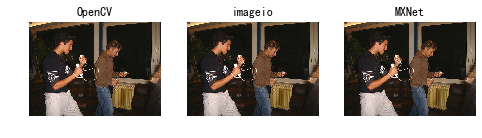

In [44]:
from matplotlib import pyplot as  plt

plt.subplot(231)
plt.imshow(cv2.cvtColor(img_cv, cv2.COLOR_BGR2RGB))
plt.title('OpenCV')
plt.axis('off')
plt.subplot(232)
plt.imshow(img_io)
plt.title('imageio')
plt.axis('off')
plt.subplot(233)
plt.imshow(img_io)
plt.title('MXNet')
plt.axis('off')
plt.show()

考虑到 OpenCV 的高效性，我们采用方式1 来处理 `images` 下的图片数据。

In [49]:
def buffer2array(Z, image_name):
    '''
    无需解压，直接获取图片数据
    
    参数
    ===========
    Z:: 图片数据是 ZipFile 对象
    '''
    buffer = Z.read(image_name)
    image = np.frombuffer(buffer, dtype="B")  # 将 buffer 转换为 np.uint8 数组
    img = cv2.imdecode(image, cv2.IMREAD_COLOR)
    return img


img = buffer2array(Z, Z.namelist()[8])
print('图片的尺寸：', img.shape)

图片的尺寸： (480, 640, 3)
